In [5]:
def plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,x_lim=[0,1],y_lim=[0,1],eq_min='true',N=11,title='unknown.png'):

    # ----- PLOTTING -----
    x = np.linspace(0,1,100)
    xx = np.linspace(xB,xD,100)
    
    # Plot results
    fig, ax = plt.subplots()

    plt.plot(x,x,color='k',linestyle='--')
    plt.plot(x,y(x),color='tab:blue',label = 'Eq. Line')
    plt.plot(xx,op_line(xx),color='tab:orange',label='R/S Line')
    plt.plot([xF,xq],[xF,mR*xq+bR],color='tab:red',marker='.',label='q-Line')
    plt.plot(x_1,y_1,linestyle='none',marker='.',color='tab:blue')
    plt.plot(x_eq,y_eq,color='k')
    
    if eq_min == 'true':
        A = x_eq[-1]
    else:
        A = y_eq[-1]
    
    plt.plot([x_eq[-1],x_eq[-1]],[0,A],marker='*',color='k',linestyle=':')
    plt.plot([x_eq[0], x_eq[0]],[0,y_eq[0]], linestyle=':',marker='*',color='k',\
             markerfacecolor='tab:orange',markeredgecolor='tab:orange')
    plt.plot([xB, xB],[0,xB], linestyle=':',marker='*',color='k',markerfacecolor='tab:orange',markeredgecolor='tab:orange')

    # Plot Labels, limits
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.xticks(np.linspace(x_lim[0],x_lim[1],N))
    plt.yticks(np.linspace(y_lim[0],y_lim[1],N))
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.tick_params(top='true', right='true', direction='in')
    plt.grid()

    # Pretty plot parameters
    font = {'family' : 'serif',
             'size'   : 12,
             'serif':  'cmr10'
             }

    plt.rcParams["figure.figsize"] = (5,3)
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": "cmr10",
    })

    plt.show()
    
    fig.savefig(title,dpi=300,bbox_inches='tight')

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import root_scalar

# Import stepping function from parent directory, may need to modify
# if the location is different
import os
import sys
current = os.path.dirname(os.path.abspath('CHEN_3100_HW_10'))
parent = os.path.dirname(current)
sys.path.append(parent + '\CHEN_3100_Toolkit')
from CHEN_3100_Stepping import stepping_MT

# Import equilibrium data from CSV Excel file (must be in the same directory!),
# store as a dataframe
df = pd.read_csv('CHEN 3100 - HW 8 - H-T Binary Data.csv')

# Sanity check the data 
display(df)

# Extract numerical quantities from the dataframe
x_1 = np.array(df['x'])
y_1 = np.array(df['y'])
p1_sat = np.array(df['P1 (kPa)'])
p2_sat = np.array(df['P2 (kPa)'])
P = 101.325 # kPa, system pressure


# Fit a 5th order polynomial to the data with the intercept set to 0,
# try not to 'overfit' the data
eq_line = lambda x, a5, a4, a3, a2, a1: a5*x**5 + a4*x**4 + a3*x**3 + a2*x**2 + a1*x

# Get parameters and their estimated errors
params, p_cov = curve_fit(eq_line, x_1, y_1)

# Print parameters
print('5th order polynomial fit parameters: ')
print(params)
print('\n')
# Print estimated relative errors in the parameters
print('Relative error in fit parameters: ')
print(np.sqrt(np.diag(p_cov))/np.abs(params))
print('\n')

[a5,a4,a3,a2,a1] = params

# Print estimated R^2 value
R2 = 1 - np.sum((y_1-eq_line(x_1,a5,a4,a3,a2,a1))**2)/np.sum((y_1-np.mean(y_1))**2)
print('R^2: %0.3f' % R2)

,T (F),T (K),T (C),P1 (kPa),P2 (kPa),x,y
0,209.3,371.6,98.5,101.4,70.745,1.000,1.000
1,211.7,373.0,99.8,105.5,73.732,0.871,0.906
2,214.2,374.3,101.2,109.7,76.818,0.747,0.808
3,216.6,375.7,102.5,114.1,80.005,0.628,0.707
4,219.0,377.0,103.9,118.6,83.297,0.513,0.600
5,221.5,378.4,105.2,123.2,86.694,0.403,0.490
6,223.9,379.7,106.6,127.9,90.200,0.297,0.374
7,226.4,381.1,107.9,132.8,93.817,0.194,0.255
8,228.8,382.4,109.3,137.9,97.548,0.095,0.130
9,231.2,383.8,110.7,143.1,101.394,0.000,0.000


5th order polynomial fit parameters: 
[ 0.18441874 -0.49505969  0.58043598 -0.6996274   1.42988993]


Relative error in fit parameters: 
[0.54824401 0.50487747 0.37351257 0.11018712 0.00657261]


R^2: 1.000


D = 180.233
B = 69.767


C:\Users\pheng\AppData\Local\Temp\ipykernel_32760\3069062717.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


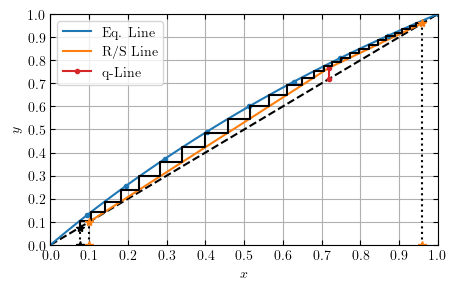

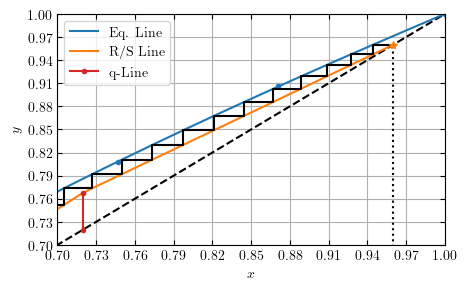

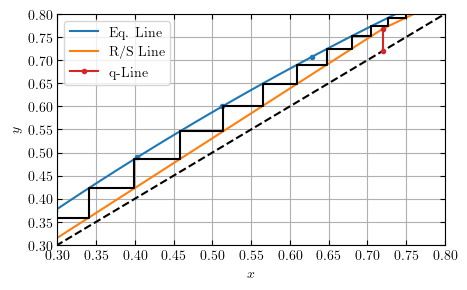

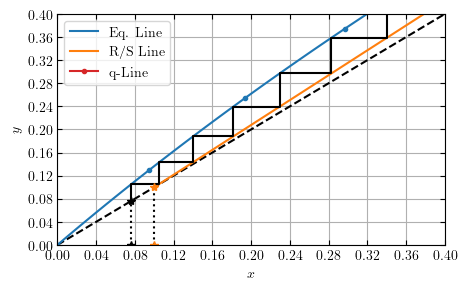

Bottoms Composition: 0.076
0.768
1.0774193548387097
-0.007741935483870966


In [7]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.72
xD = 0.96
xB = 0.10
F = 250 # mol/hr
R = 4
xq = xF

# Distillate, Bottoms Flow
D = F*(xF-xB)/(xD-xB)
B = F - D
print('D = %0.3f' % D)
print('B = %0.3f' % B)

# Rectifying slope/intercept
bR = xD/(R+1)
mR = (xD-bR)/xD
yq = mR*xq + bR


# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])


# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,1],[0,1],eq_min='false',title='CHEN_3100_HW_10_1.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.7,1],[0.7,1],title='CHEN_3100_HW_10_2.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.3,0.8],[0.3,0.8],title='CHEN_3100_HW_10_3.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.4],[0,0.4],title='CHEN_3100_HW_10_4.png')

print('Bottoms Composition: %0.3f' % x_eq[-1])
print(yq)
print(mS)
print(bS)

C:\Users\pheng\AppData\Local\Temp\ipykernel_28848\3069062717.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


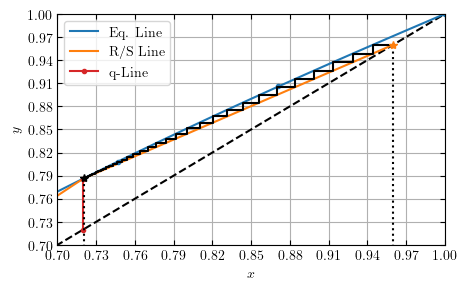

Bottoms Composition: 0.720
0.7861223488663964
0.7244902130566815
2.6296351251062204


In [12]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.72
xD = 0.96
xB = 0.10
F = 250 # mol/hr

xq = xF
yq = y(xq)

# Rectifying slope/intercept
mR = (xD-yq)/(xD-xq)
bR = (1-mR)*xD


# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])


# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line,max_iter=50)

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.7,1],[0.7,1],eq_min='false',title='CHEN_3100_HW_10_5.png')

print('Bottoms Composition: %0.3f' % x_eq[-1])
print(yq)
print(mR)
print(mR/(1-mR))

C:\Users\pheng\AppData\Local\Temp\ipykernel_28848\3069062717.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


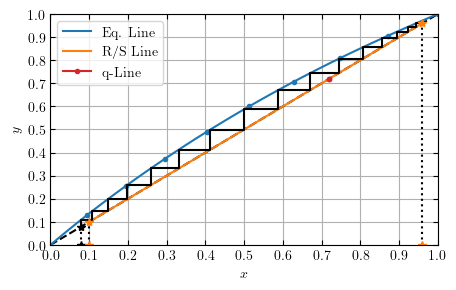

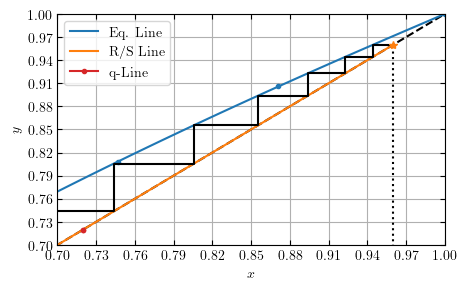

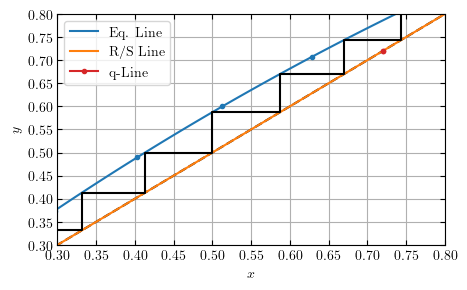

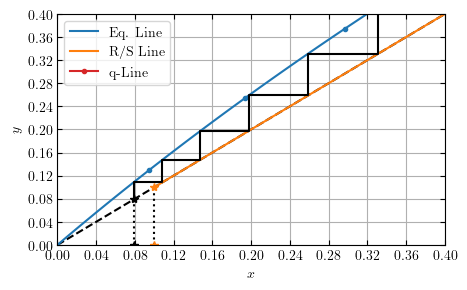

Bottoms Composition: 0.079


In [13]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.72
xD = 0.96
xB = 0.10
F = 250 # mol/hr

xq = xF
yq = xq

# Rectifying slope/intercept
mR = (xD-yq)/(xD-xq)
bR = (1-mR)*xD


# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])


# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line,max_iter=50)

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,1],[0,1],eq_min='false',title='CHEN_3100_HW_10_6.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.7,1],[0.7,1],title='CHEN_3100_HW_10_7.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.3,0.8],[0.3,0.8],title='CHEN_3100_HW_10_8.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.4],[0,0.4],title='CHEN_3100_HW_10_9.png')


print('Bottoms Composition: %0.3f' % x_eq[-1])

Bottoms Composition: 0.093


C:\Users\pheng\AppData\Local\Temp\ipykernel_28848\3069062717.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


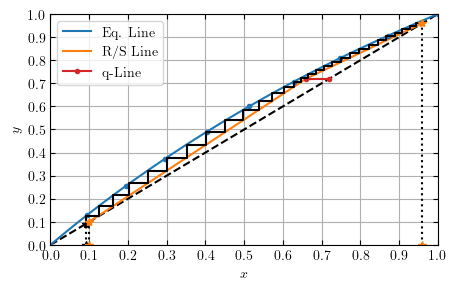

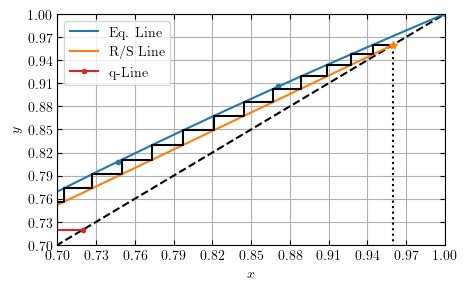

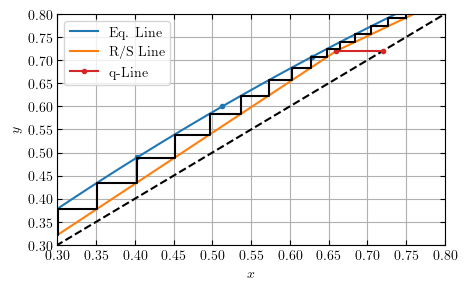

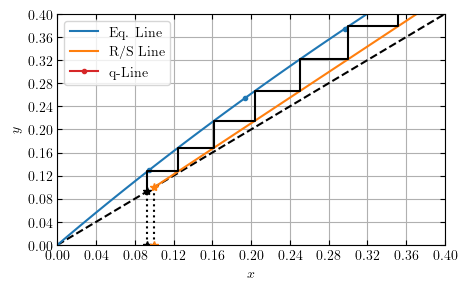

0.72
0.8
0.192
1.1071428571428572
-0.010714285714285721


In [14]:
# ----- SAT. VAPOR FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.72
xD = 0.96
xB = 0.10
F = 250 # mol/hr
R = 4
yq = xF


# Rectifying slope/intercept
bR = xD/(R+1)
mR = (xD-bR)/xD
xq = (yq-bR)/mR

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])



# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line)
print('Bottoms Composition: %0.3f' % x_eq[-1])

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,1],[0,1],eq_min='false',title='CHEN_3100_HW_10_10.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.7,1],[0.7,1],title='CHEN_3100_HW_10_11.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.3,0.8],[0.3,0.8],title='CHEN_3100_HW_10_12.png')

plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.4],[0,0.4],title='CHEN_3100_HW_10_13.png')

print(yq)
print(mR)
print(bR)
print(mS)
print(bS)

Bottoms Composition: 0.643


C:\Users\pheng\AppData\Local\Temp\ipykernel_28848\3069062717.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


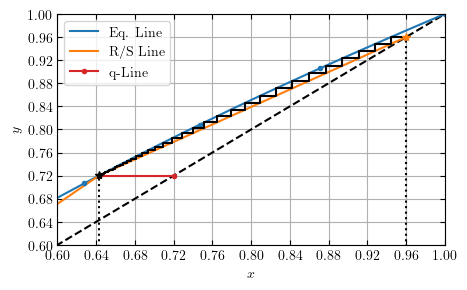

0.6428737208866798
0.756796316820656
3.1117798337888525


In [15]:
# ----- SAT. VAPOR FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.72
xD = 0.96
xB = 0.10
F = 250 # mol/hr
yq = xF
sol = root_scalar(lambda x: y(x)-yq,method='secant',x0=xF)
xq = sol.root

# Rectifying slope/intercept
mR = (xD-xF)/(xD-xq)
bR = (1-mR)*xD

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])



# ----- PLOTTING -----
x_eq, y_eq = stepping_MT(xD,xB,y,op_line,max_iter=50)
print('Bottoms Composition: %0.3f' % x_eq[-1])

# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0.6,1],[0.6,1],eq_min='false',title='CHEN_3100_HW_10_14.png')
print(xq)
print(mR)
print(mR/(1-mR))

In [16]:
# Import equilibrium data from CSV Excel file (must be in the same directory!),
# store as a dataframe
df = pd.read_csv('CHEN 3100 - HW 10 - nH-T Rel Vol.csv')

# Sanity check the data 
display(df)

# Extract numerical quantities from the dataframe
x = np.array(df['x'])
aij = np.array(df['aij'])


# Fit a linear line to the data
eq_line = lambda x, a1, a0: a1*x + a0

# Get parameters and their estimated errors
params, p_cov = curve_fit(eq_line, x, aij)


# Print parameters
print('1st order polynomial fit parameters: ')
print(params)
print('\n')
# Print estimated relative errors in the parameters
print('Relative error in fit parameters: ')
print(np.sqrt(np.diag(p_cov))/np.abs(params))
print('\n')

[a1,a0] = params

a = lambda x: a1*x + a0

# Print estimated R^2 value
R2 = 1 - np.sum((aij-a(x))**2)/np.sum((aij-np.mean(aij))**2)
print('R^2: %0.3f' % R2)

,x,aij
0,0.871106,1.430769
1,0.747217,1.428254
2,0.628074,1.425762
3,0.513433,1.423290
4,0.403062,1.420839
5,0.296745,1.418409
6,0.194278,1.415999
7,0.095466,1.413609
8,0.000129,1.411239


1st order polynomial fit parameters: 
[0.0224197  1.41156761]


Relative error in fit parameters: 
[1.24248402e-02 9.91656956e-05]


R^2: 0.999


C:\Users\pheng\AppData\Local\Temp\ipykernel_28848\583174767.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


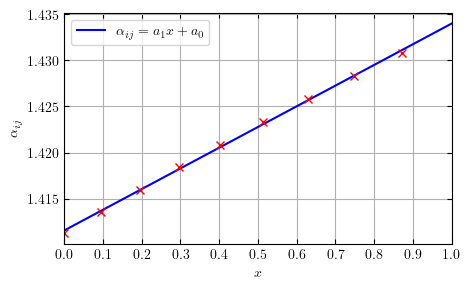

In [17]:
xx = np.linspace(0,1,2)

fig, ax = plt.subplots()
plt.plot(xx,a(xx),label='$\\alpha_{ij}=a_1x+a_0$',color='b')
plt.plot(x,aij,marker='x',linestyle='none',color='r')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$\\alpha_{ij}$')
plt.tick_params(top='true', right='true', direction='in')
plt.grid()
plt.xlim([0,1])
plt.xticks(np.linspace(0,1,11))

font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "cmr10",
})

plt.show()

fig.savefig('CHEN_3100_HW_10_15.png',dpi=300,bbox_inches='tight')

In [18]:
aij_D = a(0.96)
aij_B = a(0.10)
aij_F = a(0.72)
aij_M = np.sqrt(aij_D*aij_B)

print('aij_D = %0.3f' % aij_D)
print('aij_B = %0.3f' % aij_B)
print('aij_F = %0.3f' % aij_F)
print('aij_M = %0.3f' % aij_M)

xD = 0.96
xB = 0.10
xD2 = 1 - xD
xB2 = 1 - xB

N_min = np.log((xD/xB)*(xB2/xD2))/np.log(aij_M)

print('N_min = %0.3f' % N_min)


aij_D = 1.433
aij_B = 1.414
aij_F = 1.428
aij_M = 1.423
N_min = 15.225


1.091562098880905


C:\Users\pheng\AppData\Local\Temp\ipykernel_28848\3870029625.py:38: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()
C:\Users\pheng\AppData\Local\Temp\ipykernel_28848\3870029625.py:8: RuntimeWarning: divide by zero encountered in divide
  ff += aij_inf[i]*xF[i]/(aij_inf[i]-x)


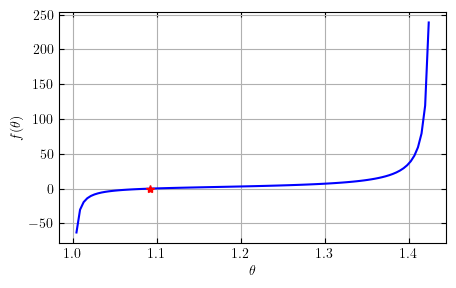

R_min = 2.641
X = 0.272
Y = 0.402
N = 26.138


In [19]:
aij_inf = [aij_F,1]
xF = [0.72,0.28]
xD = [0.96,0.04]

def f(x):
    ff = 0
    for i in range(np.size(aij_inf)):
        ff += aij_inf[i]*xF[i]/(aij_inf[i]-x)
    return ff

def R_min(theta):
    R = -1
    for i in range(np.size(aij_inf)):
        R += aij_inf[i]*xD[i]/(aij_inf[i]-theta)
    return R


sol = root_scalar(f,x0=1.2)
theta = sol.root
print(theta)

xx = np.linspace(1,aij_M,100)


font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "cmr10",
})


fig, ax = plt.subplots()
plt.plot(xx,f(xx),color='b')
plt.plot(theta,f(theta),marker='*',color='r')
plt.xlabel('$\\theta$')
plt.ylabel('$f(\\theta)$')
plt.tick_params(direction='in',top='true',bottom='true',left='true',right='true')
plt.grid()

plt.show()

fig.savefig('CHEN_3100_HW_10_16.png',dpi=300,bbox_inches='tight')


R = R_min(theta)

print('R_min = %0.3f' % R)

X = (4-R)/(5)

print('X = %0.3f' % X)

Y = 1 - np.exp(((1+54.4*X)/(11+117.2*X))*(X-1)*X**-0.5)
print('Y = %0.3f' % Y)

N = (Y+N_min)/(1-Y)

print('N = %0.3f' % N)

In [20]:
xF = [0.72,0.28]
xD = [0.96,0.04]
xB = [0.10,0.90]
F = 250

# Distillate, Bottoms Flow
D = F*(xF[0]-xB[0])/(xD[0]-xB[0])
B = F - D
print('D = %0.3f' % D)
print('B = %0.3f' % B)

NR_NS = ((xF[1]/xF[0])*(xB[0]/xD[1])**2*(B/D))**0.206

NS = (N-1)/(NR_NS+1)
NR = N - NS - 1
print('NR/NS = %0.3f' % NR_NS)
print('NS = %0.3f' % NS) 
print('NR = %0.3f' % NR) 

D = 180.233
B = 69.767
NR/NS = 0.988
NS = 12.648
NR = 12.490


1.1197587438964836


C:\Users\pheng\AppData\Local\Temp\ipykernel_28848\1827591784.py:25: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()
C:\Users\pheng\AppData\Local\Temp\ipykernel_28848\1827591784.py:8: RuntimeWarning: divide by zero encountered in divide
  ff += aij_inf[i]*xF[i]/(aij_inf[i]-x)


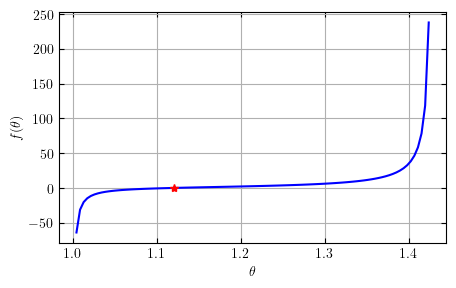

R_min = 3.117
X = 0.177
Y = 0.481
N = 30.253


In [21]:
aij_inf = [aij_F,1]
xF = [0.72,0.28]
xD = [0.96,0.04]

def f(x):
    ff = -1
    for i in range(np.size(aij_inf)):
        ff += aij_inf[i]*xF[i]/(aij_inf[i]-x)
    return ff

def R_min(theta):
    R = -1
    for i in range(np.size(aij_inf)):
        R += aij_inf[i]*xD[i]/(aij_inf[i]-theta)
    return R


sol = root_scalar(f,x0=1.2)
theta = sol.root
print(theta)

xx = np.linspace(1,aij_M,100)


fig, ax = plt.subplots()
plt.plot(xx,f(xx),color='b')
plt.plot(theta,f(theta),marker='*',color='r')
plt.xlabel('$\\theta$')
plt.ylabel('$f(\\theta)$')
plt.tick_params(direction='in',top='true',bottom='true',left='true',right='true')
plt.grid()

plt.show()

fig.savefig('CHEN_3100_HW_10_17.png',dpi=300,bbox_inches='tight')


R = R_min(theta)

print('R_min = %0.3f' % R)

X = (4-R)/(5)

print('X = %0.3f' % X)

Y = 1 - np.exp(((1+54.4*X)/(11+117.2*X))*(X-1)*X**-0.5)
print('Y = %0.3f' % Y)

N = (Y+N_min)/(1-Y)

print('N = %0.3f' % N)

In [8]:
f = [30,40,30]
d = [29.7,3.2,0]
b = [0.3,36.8,0]
aij = [2.25,1,0.21]
xF = [0.30,0.40,0.30]

N_min = np.log((d[0]/d[1])*(b[1]/b[0]))/np.log(aij[0])

b[2] = f[2]/(1+(d[1]/b[1])*aij[2]**N_min)
d[2] = f[2] - b[2]


print('N_min = %0.3f' % N_min)
print('\n d =')
print(d)
print('\n b =')
print(b)

D = np.sum(d)
B = np.sum(b)

xD = d/D
xB = b/B

print('\n xD =')
print(xD)
print('\n xB =')
print(xB)
print('D = %0.3f' % D)
print('B = %0.3f' % B)


N_min = 8.678

 d =
[29.7, 3.2, 3.4234433847757373e-06]

 b =
[0.3, 36.8, 29.999996576556615]

 xD =
[9.02735468e-01 9.72644276e-02 1.04056019e-07]

 xB =
[0.00447094 0.5484352  0.44709386]
D = 32.900
B = 67.100


1.809784247650943


C:\Users\pheng\AppData\Local\Temp\ipykernel_32760\2556040949.py:21: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()
C:\Users\pheng\AppData\Local\Temp\ipykernel_32760\2556040949.py:4: RuntimeWarning: divide by zero encountered in divide
  ff += aij[i]*xF[i]/(aij[i]-x)


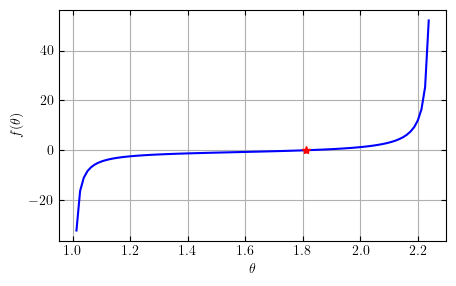

R_min = 4.367
X = 0.163
Y = 0.493
N = 18.104


In [9]:
def f(x):
    ff = -1
    for i in range(np.size(aij)):
        ff += aij[i]*xF[i]/(aij[i]-x)
    return ff

def R_min(theta):
    R = -1
    for i in range(np.size(aij)):
        R += aij[i]*xD[i]/(aij[i]-theta)
    return R


sol = root_scalar(f,x0=1.2)
theta = sol.root
print(theta)

xx = np.linspace(1,aij[0],100)


fig, ax = plt.subplots()
plt.plot(xx,f(xx),color='b')
plt.plot(theta,f(theta),marker='*',color='r')
plt.xlabel('$\\theta$')
plt.ylabel('$f(\\theta)$')
plt.tick_params(direction='in',top='true',bottom='true',left='true',right='true')
plt.grid()

plt.show()

fig.savefig('CHEN_3100_HW_10_18.png',dpi=300,bbox_inches='tight')


R_m = R_min(theta)

R = 1.25*R_m

print('R_min = %0.3f' % R)

X = (R-R_m)/(R+1)

print('X = %0.3f' % X)

Y = 1 - np.exp(((1+54.4*X)/(11+117.2*X))*(X-1)*X**-0.5)
print('Y = %0.3f' % Y)

N = (Y+N_min)/(1-Y)

print('N = %0.3f' % N)

In [24]:
NR_NS = ((xF[1]/xF[0])*(xB[0]/xD[1])**2*(B/D))**0.206

NS = (N-1)/(NR_NS+1)
NR = N - NS - 1
print('NR/NS = %0.3f' % NR_NS)
print('NS = %0.3f' % NS) 
print('NR = %0.3f' % NR) 

NR/NS = 0.345
NS = 14.585
NR = 5.039


In [34]:
d = [0,0,0,0]
b = [0,0,0,0]
aij = [1.25,1.15,1.00,0.68]
xF = np.array([0.06,0.40,0.30,0.24])
f = 80*xF

LK = 1
HK = 2

d[LK] = 0.99*f[LK]
b[LK] = f[LK] - d[LK]

b[HK] = 0.96*f[HK]
d[HK] = f[HK] - b[HK]

N_min = np.log((d[LK]/d[HK])*(b[HK]/b[LK]))/np.log(aij[LK])

for i in range(np.size(d)):
    if i < LK:
        b[i] = f[i]/(1+(d[HK]/b[HK])*aij[i]**N_min)
        d[i] = f[i] - b[i]
    elif i > HK:
        d[i] = (f[i]*(d[HK]/b[HK])*aij[i]**N_min)/(1+(d[HK]/b[HK])*aij[i]**N_min)
        b[i] = f[i] - d[i]

print('N_min = %0.3f' % N_min)
print('\n f =')
print(f)
print('\n d =')
print(d)
print('\n b =')
print(b)

D = np.sum(d)
B = np.sum(b)

xD = d/D
xB = b/B

print('\n xD =')
print(xD)
print('\n xB =')
print(xB)
print('D = %0.3f' % D)
print('B = %0.3f' % B)


0
b: 0.0
1
2
3
d: 3.0
N_min = 55.617

 f =
[ 4.8 32.  24.  19.2]

 d =
[4.799530600714616, 31.68, 0.9600000000000009, 3.8698823421586516e-10]

 b =
[0.0004693992853844752, 0.3200000000000003, 23.04, 19.19999999961301]

 xD =
[1.28194198e-01 8.46164455e-01 2.56413471e-02 1.03363538e-11]

 xB =
[1.10289969e-05 7.51871407e-03 5.41347413e-01 4.51122844e-01]
D = 37.440
B = 42.560


1.0594686573473497


C:\Users\pheng\AppData\Local\Temp\ipykernel_28848\1516062741.py:21: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()
C:\Users\pheng\AppData\Local\Temp\ipykernel_28848\1516062741.py:4: RuntimeWarning: divide by zero encountered in divide
  ff += aij[i]*xF[i]/(aij[i]-x)


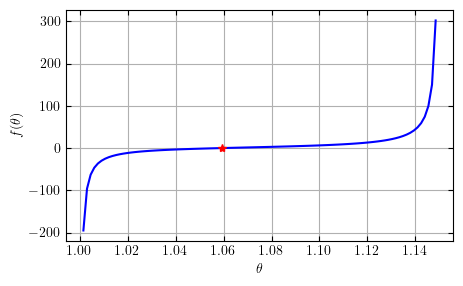

R_min = 10.159
X = 0.645
Y = 0.168
N = 67.048


In [27]:
def f(x,q):
    ff = -1+q
    for i in range(np.size(aij)):
        ff += aij[i]*xF[i]/(aij[i]-x)
    return ff

def R_min(theta):
    R = -1
    for i in range(np.size(aij)):
        R += aij[i]*xD[i]/(aij[i]-theta)
    return R


sol = root_scalar(f,x0=1.1)
theta = sol.root
print(theta)

xx = np.linspace(1,aij[LK],100)


fig, ax = plt.subplots()
plt.plot(xx,f(xx),color='b')
plt.plot(theta,f(theta),marker='*',color='r')
plt.xlabel('$\\theta$')
plt.ylabel('$f(\\theta)$')
plt.tick_params(direction='in',top='true',bottom='true',left='true',right='true')
plt.grid()

plt.show()

fig.savefig('CHEN_3100_HW_10_19.png',dpi=300,bbox_inches='tight')


R_m = R_min(theta)

print('R_min = %0.3f' % R_m)


R = 3*R_m
X = (R-R_m)/(R+1)

print('X = %0.3f' % X)

Y = 1 - np.exp(((1+54.4*X)/(11+117.2*X))*(X-1)*X**-0.5)
print('Y = %0.3f' % Y)

N = (Y+N_min)/(1-Y)

print('N = %0.3f' % N)

In [131]:
NR_NS = ((xF[HK]/xF[LK])*(xB[LK]/xD[HK])**2*(B/D))**0.206

NS = (N-1)/(NR_NS+1)
NR = N - NS - 1
print('NR/NS = %0.3f' % NR_NS)
print('NS = %0.3f' % NS) 
print('NR = %0.3f' % NR) 

NR/NS = 0.584
NS = 41.704
NR = 24.344
